The goal of this project is to classify 15 different types of vegetble that are commonly found in the market.The following are:

    1. Carrots
    2. Tomatoes
    3. Lettuce
    4. Spinach
    5. Broccoli
    6. Cucumbers
    7. Bell Peppers
    8. Potatoes
    9. Onions
    10. Garlic
    11. Zucchini
    12. Cabbage
    13. Kale
    14. Radishes
    15. Avocado



# Setting Up Necessary Things

In [1]:
 %reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 1

In [75]:
!pip install -Uqq fastai

In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/Master_Course/Vegetable_Recognizer

/content/drive/My Drive/Master_Course/Vegetable_Recognizer


# Fetch Data

In [6]:
data_path = "data"
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [7]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls,f"veg_dataloader_v{version}.pkl")

In [8]:
 dls = torch.load(f"veg_dataloader_v{version}.pkl")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


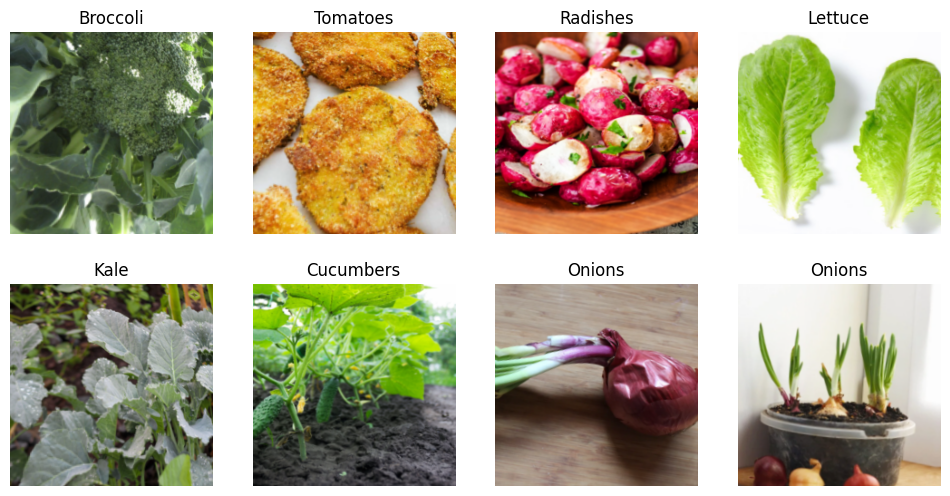

In [9]:
dls.train.show_batch(max_n=8, nrows=2)

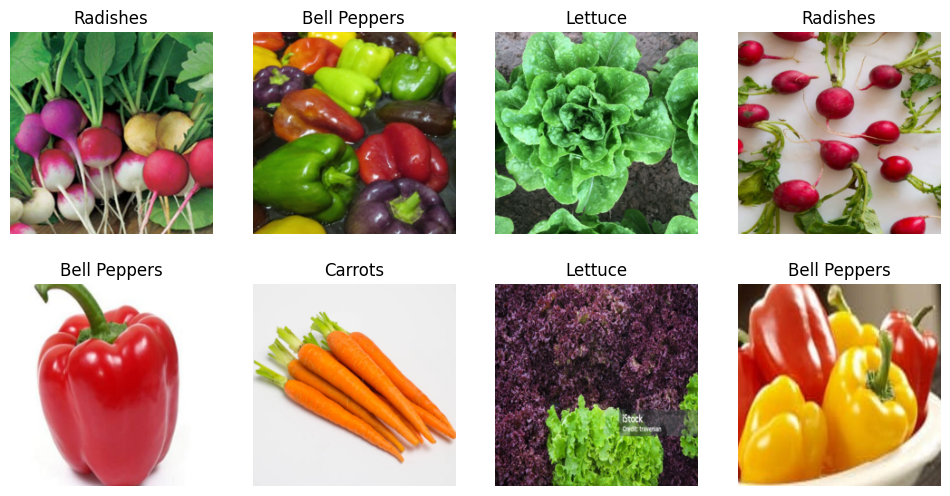

In [10]:
dls.valid.show_batch(max_n=8, nrows=2)

# Training and Data Cleaning

In [11]:
model_path = "model"

In [12]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 141MB/s]


In [13]:
#model.load(f"veg_dataloader_v{version}.pkl")

In [14]:
 model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.993441,0.759946,0.239130,0.760870,06:08


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.971496,0.651915,0.192029,0.807971,01:58
1,0.809100,0.600797,0.166667,0.833333,01:59
2,0.537087,0.492515,0.134058,0.865942,01:56
3,0.354968,0.479973,0.137681,0.862319,01:56
4,0.261925,0.473168,0.141304,0.858696,01:55


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [15]:
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.241328,0.492597,0.144928,0.855072,02:05


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.371343,0.668698,0.152174,0.847826,01:57


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [16]:
model.save(f"veg-recognizer-v{version}")

Path('models/veg-recognizer-v1.pth')

In [17]:
# model.load(f"veg-recognizer-v{version}")

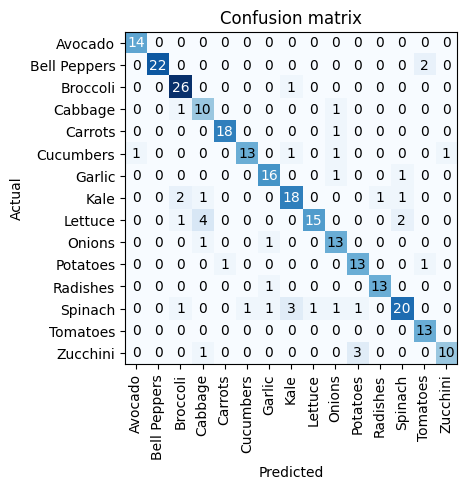

In [18]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

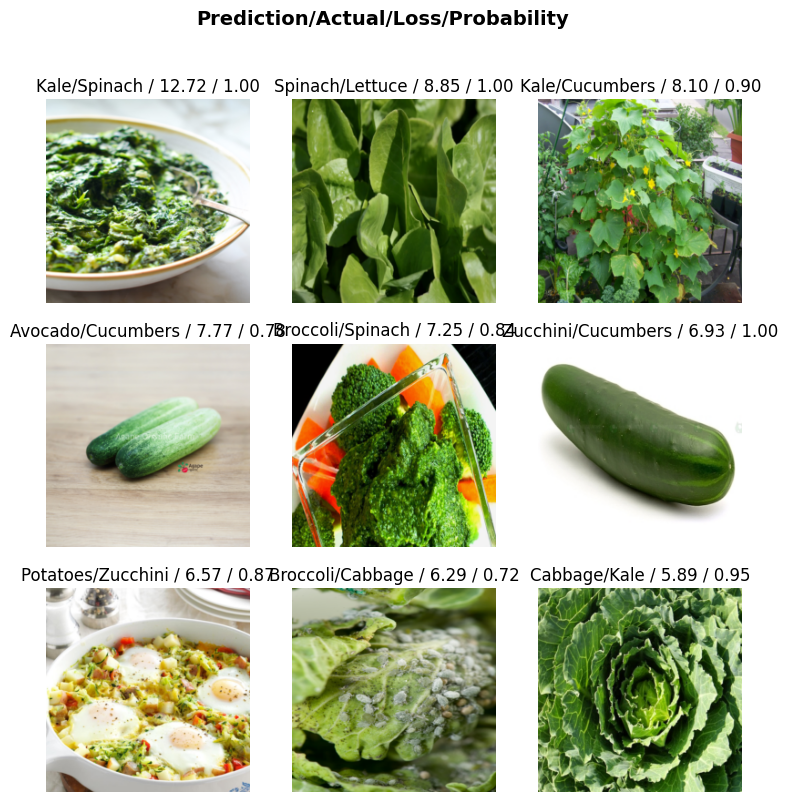

In [19]:
interp.plot_top_losses(9, nrows=3)

In [81]:
!pip install -U fastai

In [82]:
cleaner = ImageClassifierCleaner(model)
cleaner

ValueError: ignored

In [68]:
cleaner.delete()

(#7) [2,3,6,8,9,21,22]

In [69]:
cleaner.change()

(#0) []

In [70]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

# Export model for inference

In [84]:
model.export(f"/content/drive/MyDrive/Master_Course/Vegetable_Recognizer/models/veg-recognizer-v{version}.pkl")